In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'
!wget $data 

In [3]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
status_value = { 
    1 : 'ok', 
    2 : 'default',
    0 : 'unk'
}
df.status = df.status.map(status_value)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
home_value = { 
    1 : 'rent', 
    2 : 'owner',
    3 : 'private',
    4: 'ignore',
    5 : 'parents', 
    6 : 'others',
    0 : 'unk'
}

marital_values = { 
    1 : 'single', 
    2 : 'married',
    3 : 'window',
    4 : 'separated',
    5 : 'divorced',
    0 : 'unk'
}
record_value = { 
    1 : 'no', 
    2 : 'yes',
    0 : 'unk'
}

job_values = { 
    1 : 'fixed', 
    2 : 'partime',
    3 : 'freelance',
    4 : 'others',
    0 : 'unk'
}

df.home = df.home.map(home_value)
df.marital = df.marital.map(marital_values)
df.job = df.job.map(job_values)
df.records = df.records.map(record_value)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,window,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [9]:
for c in [ 'income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999 , value=np.nan)

In [10]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [11]:
df.income.max()

np.float64(959.0)

In [12]:
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [13]:
df = df[df.status !='unk'].reset_index(drop=True)

In [14]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [16]:
del df_train['status']
del df_val['status']
del df_test['status']

In [17]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2667,18,private,36,45,married,no,fixed,45,220.0,20000.0,0.0,800,1600
2668,7,private,60,29,married,no,fixed,60,51.0,3500.0,500.0,1000,1290
2669,1,parents,24,19,single,no,fixed,35,28.0,0.0,0.0,400,600
2670,15,owner,48,43,married,no,freelance,60,100.0,18000.0,0.0,2500,2976


## Decision Tree 

In [18]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else: 
            return 'ok'
    else: 
        if client['assets'] > 6000:
            return 'ok'
        else: 
            return 'default'
        

In [19]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [20]:
assess_risk(xi)

'ok'

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [22]:
train_dict = df_train.fillna(0).to_dict(orient='records')

In [23]:
dv = DictVectorizer(sparse=False)
x_train = dv.fit_transform(train_dict)

In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [25]:
val_dict = df_val.fillna(0).to_dict(orient='records')
x_val = dv.transform(val_dict)

In [26]:
y_pred = dt.predict_proba(x_val)
y_pred = y_pred[:,1]

In [27]:
roc_auc_score(y_val, y_pred)

0.6508591460608849

### Overfitting - Avoid 

In [28]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(x_train,y_train)
x_val = dv.transform(val_dict)

y_pred_train  = dt1.predict_proba(x_train)
y_pred_t = y_pred_train[:,1]
auc_t = roc_auc_score(y_train, y_pred_t)
print("train : " ,auc_t)
y_pred_val  = dt1.predict_proba(x_val)
y_pred_v = y_pred_val[:,1]
auc_v = roc_auc_score(y_val, y_pred_v)
print("val : " ,auc_v)


train :  0.7761016984958594
val :  0.7389079944782155


## Decision Tree Learning Algorithms 

In [29]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [30]:
from IPython import display

threshold = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}



In [31]:
for feature, Ts in threshold.items():
    print(feature, Ts)
    for T in Ts : 
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
        val_left = df_left.status.value_counts(normalize=True)
        val_right = df_right.status.value_counts(normalize=True)
        print(val_left)
        print(df_left)
        print("=====")
        print(df_right)
        print(val_right)
        print("=====")
        


assets [0, 2000, 3000, 4000, 5000, 8000]
status
default    1.0
Name: proportion, dtype: float64
   assets  debt   status
2       0  1000  default
=====
   assets  debt   status
0    8000  3000  default
1    2000  1000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default
status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
=====
status
default    1.0
Name: proportion, dtype: float64
   assets  debt   status
1    2000  1000  default
2       0  1000  default
=====
   assets  debt   status
0    8000  3000  default
3    5000  1000       ok
4    5000  1000       ok
5    4000  1000       ok
6    9000   500       ok
7    3000  2000  default
status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
=====
status
default    1.0
Name: proportion, dtype: float64
   assets  debt   status
1    2000  1000  default
2       0  1000  default
7    3000  2000  default
=====
   a

## Decision Tree Parameter Tuning

In [32]:
for d in [1,2,3,4,5,6,7,10,12,15, None]: 
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(x_train,y_train)
    y_pred = dt.predict_proba(x_val)
    y_pred = y_pred[:,1]
    auc1 = roc_auc_score(y_val, y_pred)

    print("%4s --> %.3f" %(d,auc1))
    



   1 --> 0.606
   2 --> 0.669
   3 --> 0.739
   4 --> 0.761
   5 --> 0.767
   6 --> 0.761
   7 --> 0.750
  10 --> 0.685
  12 --> 0.673
  15 --> 0.671
None --> 0.663


In [33]:
for d in [4,5,6]: 
    for s in [1, 5, 10, 15, 20, 500, 100, 200]: 
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(x_train,y_train)
        y_pred = dt.predict_proba(x_val)
        y_pred = y_pred[:,1]
        auc1 = roc_auc_score(y_val, y_pred)
    
        print("(%4s ,%3d)--> %.3f" %(d,s,auc1))
        

(   4 ,  1)--> 0.761
(   4 ,  5)--> 0.761
(   4 , 10)--> 0.761
(   4 , 15)--> 0.764
(   4 , 20)--> 0.761
(   4 ,500)--> 0.680
(   4 ,100)--> 0.756
(   4 ,200)--> 0.747
(   5 ,  1)--> 0.766
(   5 ,  5)--> 0.768
(   5 , 10)--> 0.762
(   5 , 15)--> 0.772
(   5 , 20)--> 0.774
(   5 ,500)--> 0.680
(   5 ,100)--> 0.763
(   5 ,200)--> 0.759
(   6 ,  1)--> 0.749
(   6 ,  5)--> 0.762
(   6 , 10)--> 0.778
(   6 , 15)--> 0.785
(   6 , 20)--> 0.774
(   6 ,500)--> 0.680
(   6 ,100)--> 0.776
(   6 ,200)--> 0.768


In [34]:
scores = []

for d in [4,5,6]: 
    for s in [1, 5, 10, 15, 20, 500, 100, 200]: 
        dt = DecisionTreeClassifier(max_depth=d,min_samples_leaf=s)
        dt.fit(x_train,y_train)
        y_pred = dt.predict_proba(x_val)
        y_pred = y_pred[:,1]
        auc1 = roc_auc_score(y_val, y_pred)
        scores.append((d,s,auc1))
        #print("(%4s ,%3d)--> %.3f" %(d,s,auc1))    

In [35]:
df_scores = pd.DataFrame(scores, columns=['depth', 'min_sample_leafs', 'auc'])
df_scores

,depth,min_sample_leafs,auc
0,4,1,0.761283
1,4,5,0.761283
2,4,10,0.761283
3,4,15,0.763726
4,4,20,0.760910
5,4,500,0.679842
6,4,100,0.755937
7,4,200,0.747260
8,5,1,0.766938
9,5,5,0.768173


In [36]:
df_scores_pivot = df_scores.pivot(index='min_sample_leafs', columns=['depth'], values=['auc'])
df_scores_pivot

auc                    
depth                    4         5         6
min_sample_leafs                              
1                 0.761283  0.766938  0.754483
5                 0.761283  0.768173  0.762651
10                0.761283  0.762276  0.777803
15                0.763726  0.772723  0.785474
20                0.760910  0.774028  0.773634
100               0.755937  0.763384  0.776434
200               0.747260  0.759073  0.768267
500               0.679842  0.679842  0.679842

<Axes: xlabel='None-depth', ylabel='min_sample_leafs'>

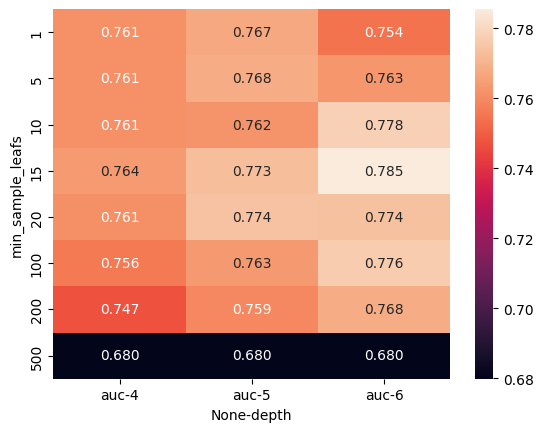

In [37]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")


## Random Forest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred = rf.predict_proba(x_val)[:,1]
y_pred

array([0. , 0.1, 0.4, 0.2, 0.1, 0.2, 0. , 0.7, 0.3, 0. , 0.3, 0.8, 0.3,
       0. , 0.2, 0.7, 0. , 0.6, 0. , 0.2, 0. , 0.2, 0. , 0.5, 0.7, 0.5,
       0.5, 0.3, 0.7, 0. , 0.7, 0.4, 0.4, 0.5, 0. , 0. , 1. , 0.2, 0.9,
       0.6, 0.2, 0.8, 0. , 0.3, 0. , 0.1, 0.9, 0. , 0.2, 0. , 0. , 0.1,
       0.1, 0.2, 0.5, 0.1, 0. , 0.5, 0. , 0.1, 0. , 0.2, 0.3, 0.4, 0. ,
       0.1, 0.2, 0.2, 0. , 0.2, 0. , 0. , 0. , 0.2, 0.3, 0.6, 0. , 0.6,
       0.7, 0. , 0.8, 0.3, 0.4, 0.4, 0.1, 0.6, 1. , 0.4, 0.6, 0. , 0.8,
       0.1, 0. , 0.1, 0.3, 0.1, 0.6, 0.1, 0. , 0.1, 0.1, 0.1, 0.3, 0. ,
       0.2, 0. , 0. , 0.4, 0. , 0.2, 0.2, 0. , 0.2, 0.5, 0.2, 0.1, 0.4,
       0. , 0. , 0.1, 0. , 0.2, 0.8, 0.1, 0.3, 0.2, 0.6, 0.1, 0.1, 0.2,
       0.7, 0.1, 0.7, 0.1, 0.1, 0.7, 0.3, 0.4, 0.1, 0.7, 0.2, 0.4, 0. ,
       0.9, 0.8, 1. , 0.7, 0. , 0.6, 0.8, 0.4, 0.2, 0.5, 0.4, 0. , 0. ,
       0.2, 0.2, 0.2, 0.4, 0.7, 0.1, 0.5, 0.8, 0.6, 0.3, 0. , 0.5, 0.9,
       0.2, 0. , 0.7, 0.1, 0. , 0.2, 0. , 0.2, 0.1, 0.2, 0.1, 0.

In [41]:
roc_auc_score(y_val,y_pred)

0.7823587464580659

In [42]:
rf_scores = []
for n in range(10,201,10): 
    rf = RandomForestClassifier(n_estimators=n,random_state=1)
    rf.fit(x_train,y_train)
    y_pred = rf.predict_proba(x_val)[:,1]
    auc_rf = roc_auc_score(y_val,y_pred)
    rf_scores.append((n,auc_rf))
rf_scores

[(10, 0.7744726453706618),
 (20, 0.8035316412777603),
 (30, 0.8150747136179797),
 (40, 0.8156862270228379),
 (50, 0.8170818095953114),
 (60, 0.8164581870141193),
 (70, 0.8173209658279045),
 (80, 0.8163068223099464),
 (90, 0.8168244895982175),
 (100, 0.8175994768835824),
 (110, 0.8175268218255793),
 (120, 0.8179385338209295),
 (130, 0.8182533724056089),
 (140, 0.818102007701436),
 (150, 0.8172695018284857),
 (160, 0.8179809159380979),
 (170, 0.8176055314717492),
 (180, 0.8174632486498269),
 (190, 0.817980915938098),
 (200, 0.8190495507495582)]

In [43]:
df1 = pd.DataFrame(rf_scores, columns=['n_estimators','auc'])
df1

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


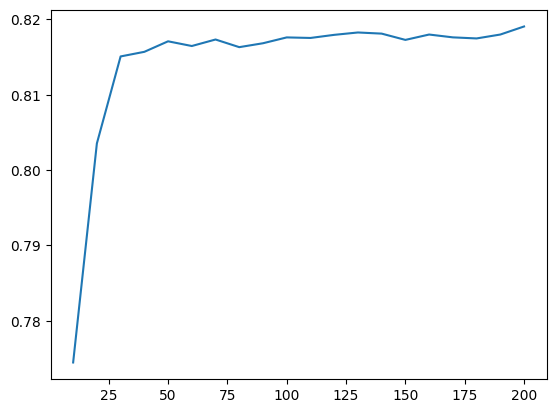

In [44]:
plt.plot(df1.n_estimators, df1.auc)

### Tuning using max_depth for random forest 

In [45]:
rf_dep_scores = []
for d in [5,10,15]: 
    for n in range(10,201,10): 
        rf = RandomForestClassifier(n_estimators=n,max_depth=d, random_state=1)
        rf.fit(x_train,y_train)
        y_pred = rf.predict_proba(x_val)[:,1]
        auc_rf = roc_auc_score(y_val,y_pred)
        rf_dep_scores.append((d,n,auc_rf))
rf_dep_scores

[(5, 10, 0.7876988932212832),
 (5, 20, 0.7977313458138577),
 (5, 30, 0.8003045457847957),
 (5, 40, 0.7997081688503548),
 (5, 50, 0.7998776973190285),
 (5, 60, 0.8011673245985809),
 (5, 70, 0.8022510958804582),
 (5, 80, 0.803244048339832),
 (5, 90, 0.8036164055120971),
 (5, 100, 0.8044519386791311),
 (5, 110, 0.8066255358310528),
 (5, 120, 0.8064499527742124),
 (5, 130, 0.8080544186384443),
 (5, 140, 0.807019084061902),
 (5, 150, 0.8072188854714104),
 (5, 160, 0.8071341212370734),
 (5, 170, 0.8069645927683999),
 (5, 180, 0.8072612675885785),
 (5, 190, 0.8072309946477441),
 (5, 200, 0.8073520864110824),
 (10, 10, 0.7913649463563488),
 (10, 20, 0.8084964035746288),
 (10, 30, 0.8115842435397544),
 (10, 40, 0.8178386331161753),
 (10, 50, 0.8170575912426437),
 (10, 60, 0.8186560025187086),
 (10, 70, 0.8202301954421061),
 (10, 80, 0.8204118330871135),
 (10, 90, 0.8198427017994235),
 (10, 100, 0.8211686566079774),
 (10, 110, 0.8226459761207041),
 (10, 120, 0.8232272165847279),
 (10, 130, 0.824

In [46]:
df_depth_score = pd.DataFrame(rf_dep_scores, columns=['max_depth','n_estimators','auc'])

In [47]:
df_depth_score

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878
5,5,60,0.801167
6,5,70,0.802251
7,5,80,0.803244
8,5,90,0.803616
9,5,100,0.804452


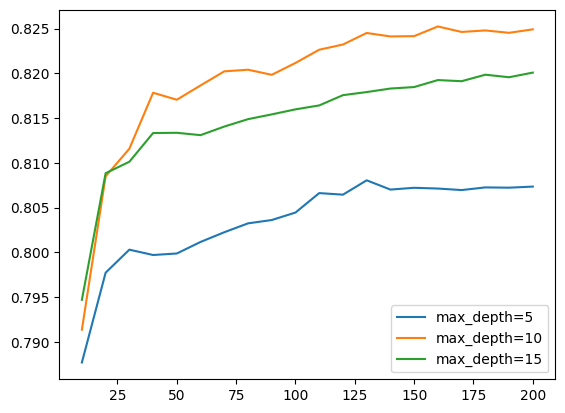

In [48]:
for d in [5,10,15]: 
    df_subset = df_depth_score[df_depth_score.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%s' %d)
    plt.legend()

In [49]:
rf_lef_scores = []
max_depth=10
for s in [1,3,5,10,50]: 
    for n in range(10,201,10): 
        rf = RandomForestClassifier(n_estimators=n,max_depth=max_depth,min_samples_leaf=s, random_state=1)
        rf.fit(x_train,y_train)
        y_pred = rf.predict_proba(x_val)[:,1]
        auc_rf = roc_auc_score(y_val,y_pred)
        rf_lef_scores.append((s,n,auc_rf))
rf_lef_scores

[(1, 10, 0.7913649463563488),
 (1, 20, 0.8084964035746288),
 (1, 30, 0.8115842435397544),
 (1, 40, 0.8178386331161753),
 (1, 50, 0.8170575912426437),
 (1, 60, 0.8186560025187086),
 (1, 70, 0.8202301954421061),
 (1, 80, 0.8204118330871135),
 (1, 90, 0.8198427017994235),
 (1, 100, 0.8211686566079774),
 (1, 110, 0.8226459761207041),
 (1, 120, 0.8232272165847279),
 (1, 130, 0.8245168438642805),
 (1, 140, 0.824129350221598),
 (1, 150, 0.8241656777505995),
 (1, 160, 0.8252433944443098),
 (1, 170, 0.8246318810394516),
 (1, 180, 0.8248014095081252),
 (1, 190, 0.8245350076287811),
 (1, 200, 0.8249225012714635),
 (3, 10, 0.8107577922549707),
 (3, 20, 0.819806374270422),
 (3, 30, 0.822530938945533),
 (3, 40, 0.822101063185682),
 (3, 50, 0.8229365963527162),
 (3, 60, 0.8227065220023735),
 (3, 70, 0.8215379864861592),
 (3, 80, 0.8226278123562035),
 (3, 90, 0.8232817078782301),
 (3, 100, 0.8233361991717324),
 (3, 110, 0.8234027996415685),
 (3, 120, 0.8245894989222833),
 (3, 130, 0.8244139158654429),

In [50]:
df_min_leaf_score = pd.DataFrame(rf_lef_scores, columns=['min_samples_leaf','n_estimators','auc'])

In [51]:
colors = ['blue','green','red','yellow','black']
min_sam_leaf = [1,3,5,10,50]
zip(min_sam_leaf,colors)


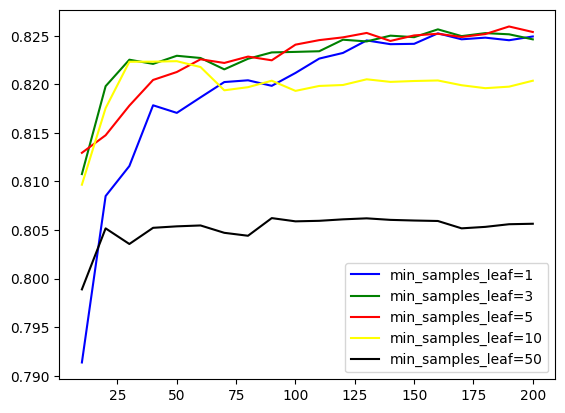

In [52]:
for s,colr in zip(min_sam_leaf,colors): 
    df_subset = df_min_leaf_score[df_min_leaf_score.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.auc,color=colr, label='min_samples_leaf=%d' %s)
    plt.legend()

In [53]:
min_samples_leaf=3

### Gradient boosting and XGBoost


In [54]:
!pip install xgboost


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip


In [57]:
import xgboost as xgb

In [62]:
features = list(dv.get_feature_names_out())

dtrain = xgb.DMatrix(x_train,label=y_train,feature_names=features)
dval = xgb.DMatrix(x_val,label=y_val,feature_names=features)

In [67]:
xgb_params = { 
    'eta' : 0.3, 
    'max_depth' : 6, 
    'min_child_weight' : 1, 
    'verbosity' : 1, 
    'nthread' : 8,
    'objective' : 'binary:logistic',
    'seed' : 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [68]:
xgb_y_pred = model.predict(dval)

In [69]:
roc_auc_score(y_val, xgb_y_pred)

0.8118506454190986

In [70]:
watchlist = [ (dtrain, 'train'), (dval , 'val')]

In [79]:
%%capture output

xgb_params = { 
    'eta' : 0.3, 
    'max_depth' : 6, 
    'min_child_weight' : 1, 
    'eval_metric' : 'auc',
    'verbosity' : 1, 
    'nthread' : 8,
    'objective' : 'binary:logistic',
    'seed' : 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=201,verbose_eval=5,
                  evals=watchlist)

In [80]:
print(output)

[0]	train-auc:0.86653	val-auc:0.77999
[5]	train-auc:0.92969	val-auc:0.80822
[10]	train-auc:0.95512	val-auc:0.81115
[15]	train-auc:0.96767	val-auc:0.81993
[20]	train-auc:0.97648	val-auc:0.81877
[25]	train-auc:0.98248	val-auc:0.81520
[30]	train-auc:0.98844	val-auc:0.81613
[35]	train-auc:0.99244	val-auc:0.81453
[40]	train-auc:0.99393	val-auc:0.81407
[45]	train-auc:0.99568	val-auc:0.81392
[50]	train-auc:0.99723	val-auc:0.81276
[55]	train-auc:0.99804	val-auc:0.81299
[60]	train-auc:0.99861	val-auc:0.81244
[65]	train-auc:0.99916	val-auc:0.81197
[70]	train-auc:0.99962	val-auc:0.81243
[75]	train-auc:0.99975	val-auc:0.81152
[80]	train-auc:0.99989	val-auc:0.81359
[85]	train-auc:0.99993	val-auc:0.81193
[90]	train-auc:0.99998	val-auc:0.81038
[95]	train-auc:0.99999	val-auc:0.80871
[100]	train-auc:0.99999	val-auc:0.80842
[105]	train-auc:1.00000	val-auc:0.80778
[110]	train-auc:1.00000	val-auc:0.80764
[115]	train-auc:1.00000	val-auc:0.80722
[120]	train-auc:1.00000	val-auc:0.80750
[125]	train-auc:1.0000

In [81]:
s = output.stdout
s

'[0]\ttrain-auc:0.86653\tval-auc:0.77999\n[5]\ttrain-auc:0.92969\tval-auc:0.80822\n[10]\ttrain-auc:0.95512\tval-auc:0.81115\n[15]\ttrain-auc:0.96767\tval-auc:0.81993\n[20]\ttrain-auc:0.97648\tval-auc:0.81877\n[25]\ttrain-auc:0.98248\tval-auc:0.81520\n[30]\ttrain-auc:0.98844\tval-auc:0.81613\n[35]\ttrain-auc:0.99244\tval-auc:0.81453\n[40]\ttrain-auc:0.99393\tval-auc:0.81407\n[45]\ttrain-auc:0.99568\tval-auc:0.81392\n[50]\ttrain-auc:0.99723\tval-auc:0.81276\n[55]\ttrain-auc:0.99804\tval-auc:0.81299\n[60]\ttrain-auc:0.99861\tval-auc:0.81244\n[65]\ttrain-auc:0.99916\tval-auc:0.81197\n[70]\ttrain-auc:0.99962\tval-auc:0.81243\n[75]\ttrain-auc:0.99975\tval-auc:0.81152\n[80]\ttrain-auc:0.99989\tval-auc:0.81359\n[85]\ttrain-auc:0.99993\tval-auc:0.81193\n[90]\ttrain-auc:0.99998\tval-auc:0.81038\n[95]\ttrain-auc:0.99999\tval-auc:0.80871\n[100]\ttrain-auc:0.99999\tval-auc:0.80842\n[105]\ttrain-auc:1.00000\tval-auc:0.80778\n[110]\ttrain-auc:1.00000\tval-auc:0.80764\n[115]\ttrain-auc:1.00000\tval-au

In [82]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results


In [83]:
df_score = parse_xgb_output(output)


In [84]:
df_score

,num_iter,train_auc,val_auc
0,0,0.86653,0.77999
1,5,0.92969,0.80822
2,10,0.95512,0.81115
3,15,0.96767,0.81993
4,20,0.97648,0.81877
5,25,0.98248,0.81520
6,30,0.98844,0.81613
7,35,0.99244,0.81453
8,40,0.99393,0.81407
9,45,0.99568,0.81392


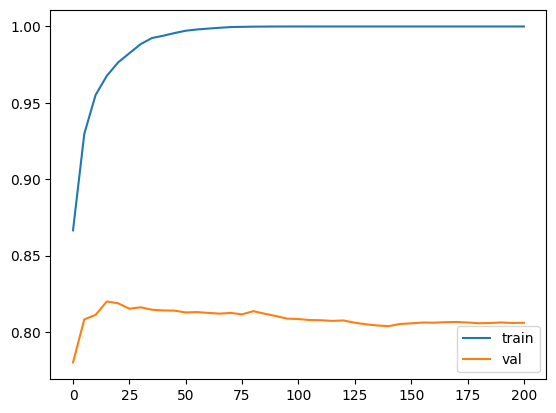

In [85]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

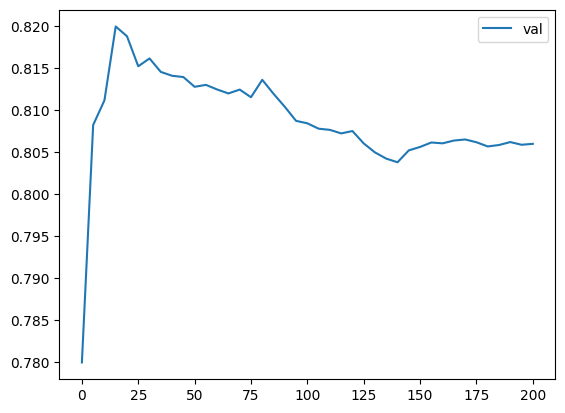

In [86]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

## XGboost Parameter  tuning

In [87]:
scores = {} 

In [97]:
%%capture output

xgb_params = { 
    'eta' : 0.05, 
    'max_depth' : 6, 
    'min_child_weight' : 1, 
    'eval_metric' : 'auc',
    'verbosity' : 1, 
    'nthread' : 8,
    'objective' : 'binary:logistic',
    'seed' : 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=201,verbose_eval=5,
                  evals=watchlist)

In [98]:
key = 'eta=%s' %(xgb_params['eta'])
key

'eta=0.05'

In [99]:
scores[key] =parse_xgb_output(output)
scores

{'eta=0.3':     num_iter  train_auc  val_auc
 0          0    0.86653  0.77999
 1          5    0.92969  0.80822
 2         10    0.95512  0.81115
 3         15    0.96767  0.81993
 4         20    0.97648  0.81877
 5         25    0.98248  0.81520
 6         30    0.98844  0.81613
 7         35    0.99244  0.81453
 8         40    0.99393  0.81407
 9         45    0.99568  0.81392
 10        50    0.99723  0.81276
 11        55    0.99804  0.81299
 12        60    0.99861  0.81244
 13        65    0.99916  0.81197
 14        70    0.99962  0.81243
 15        75    0.99975  0.81152
 16        80    0.99989  0.81359
 17        85    0.99993  0.81193
 18        90    0.99998  0.81038
 19        95    0.99999  0.80871
 20       100    0.99999  0.80842
 21       105    1.00000  0.80778
 22       110    1.00000  0.80764
 23       115    1.00000  0.80722
 24       120    1.00000  0.80750
 25       125    1.00000  0.80603
 26       130    1.00000  0.80496
 27       135    1.00000  0.80422
 28

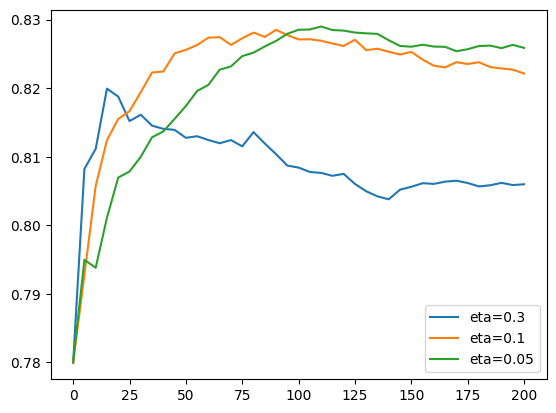

In [101]:
for eta, df_score in scores.items(): 
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

eta = 0.1 is best compared to eta values 0.05 and 0.3 

In [102]:
scores  = {} 

In [107]:
%%capture output

xgb_params = { 
    'eta' : 0.1, 
    'max_depth' : 10, 
    'min_child_weight' : 1, 
    'eval_metric' : 'auc',
    'verbosity' : 1, 
    'nthread' : 8,
    'objective' : 'binary:logistic',
    'seed' : 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=201,verbose_eval=5,
                  evals=watchlist)

In [108]:
key = 'max_depth=%s' %(xgb_params['max_depth'])
scores[key] =parse_xgb_output(output)


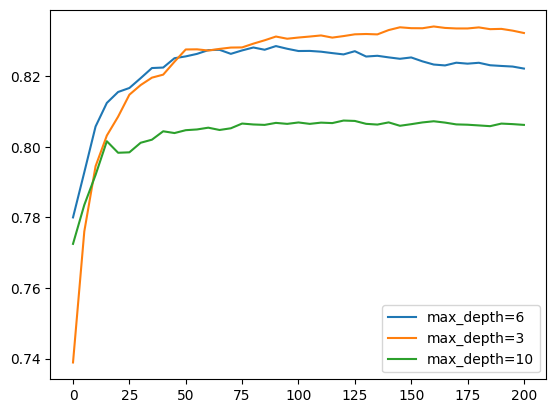

In [109]:
for max_depth, df_score in scores.items(): 
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()